# Space Server Dataset Analysis(Classification)

Table of Contents
1.  Data Preprocessing
2.  Data Visualization
3.  EDA
4.  Splitting & Sending data to model
5.  Using Ensemble techniques
6.  Using GridsearchCV
7.  Best Model
8.  Cross Validation
9.  Saving the Model

# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("SpaceDataset.csv")
df


,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [3]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [4]:
df.drop('specobjid',axis=1,inplace=True)
df.drop('objid',axis=1,inplace=True)
df.drop('fiberid',axis=1,inplace=True)
df.drop('rerun',axis=1,inplace=True)

In [5]:
df.shape

(10000, 14)

In [6]:
df.isnull().sum()

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
run         0
camcol      0
field       0
class       0
redshift    0
plate       0
mjd         0
dtype: int64

In [7]:
df['dec'].value_counts()

 0.701145     1
 0.031148     1
 0.322301     1
-0.728211     1
 60.960316    1
             ..
-0.048648     1
 0.321775     1
-3.512726     1
 57.641016    1
 0.661888     1
Name: dec, Length: 10000, dtype: int64

In [8]:
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [9]:
df['ra'].value_counts()

226.511352    1
186.864198    1
162.412783    1
242.416598    1
25.765495     1
             ..
218.427367    1
179.365032    1
187.113033    1
235.913493    1
182.372733    1
Name: ra, Length: 10000, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   camcol    10000 non-null  int64  
 9   field     10000 non-null  int64  
 10  class     10000 non-null  object 
 11  redshift  10000 non-null  float64
 12  plate     10000 non-null  int64  
 13  mjd       10000 non-null  int64  
dtypes: float64(8), int64(5), object(1)
memory usage: 1.1+ MB


In [11]:
df.describe()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,0.143726,1460.986400,52943.533300
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,0.388774,1788.778371,1511.150651
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,-0.004136,266.000000,51578.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,0.000081,301.000000,51900.000000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,0.042591,441.000000,51997.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,0.092579,2559.000000,54468.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,5.353854,8410.000000,57481.000000


# Data Visualization

['STAR' 'GALAXY' 'QSO']


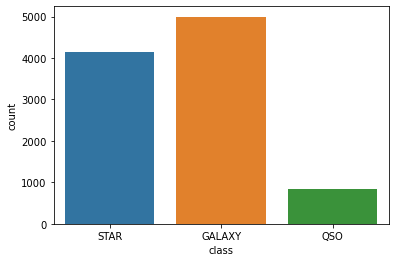

In [12]:
print(df['class'].unique())
sns.countplot(df['class'])

# EDA

In [13]:
df.corr()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd
ra,1.000000,0.003596,0.031238,0.043909,0.047103,0.045731,0.042950,-0.092741,-0.006294,0.594700,0.030307,-0.095329,-0.086887
dec,0.003596,1.000000,0.035279,0.061875,0.063404,0.058292,0.056870,0.778385,0.114614,-0.131471,0.067021,0.088342,0.066147
u,0.031238,0.035279,1.000000,0.849232,0.692379,0.602630,0.551483,0.038229,0.009945,0.008548,0.163741,-0.129430,-0.168793
g,0.043909,0.061875,0.849232,1.000000,0.958106,0.907419,0.879622,0.058446,0.010223,0.014651,0.407576,-0.054981,-0.092772
r,0.047103,0.063404,0.692379,0.958106,1.000000,0.977672,0.969197,0.057261,0.010747,0.017133,0.441080,0.019787,-0.009345
i,0.045731,0.058292,0.602630,0.907419,0.977672,1.000000,0.981507,0.049765,0.013461,0.019781,0.431450,0.072958,0.050896
z,0.042950,0.056870,0.551483,0.879622,0.969197,0.981507,1.000000,0.048252,0.010930,0.018248,0.424034,0.112397,0.095658
run,-0.092741,0.778385,0.038229,0.058446,0.057261,0.049765,0.048252,1.000000,0.151814,-0.463898,0.059056,0.093601,0.070354
camcol,-0.006294,0.114614,0.009945,0.010223,0.010747,0.013461,0.010930,0.151814,1.000000,-0.067921,0.006834,0.040795,0.026284
field,0.594700,-0.131471,0.008548,0.014651,0.017133,0.019781,0.018248,-0.463898,-0.067921,1.000000,0.015414,-0.093723,-0.086558


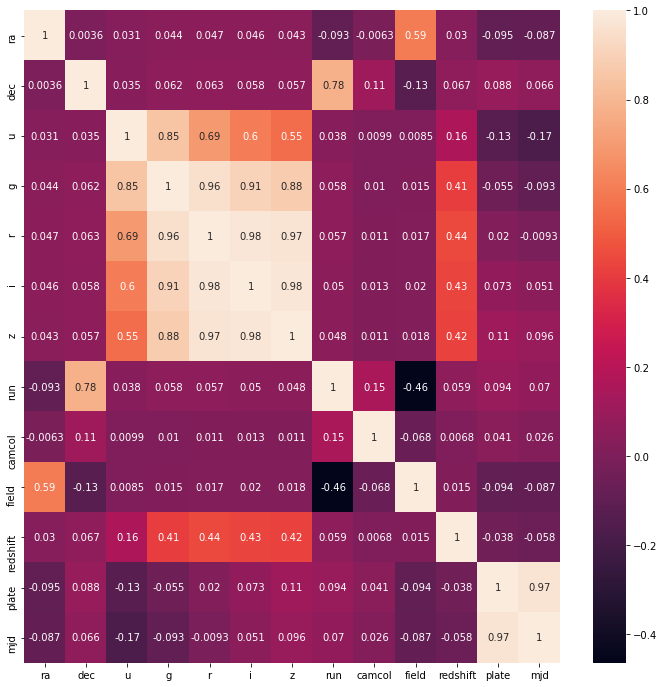

In [14]:
# heatmap correlation
import seaborn as sns
corr_hmap=df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df.dtypes 

ra          float64
dec         float64
u           float64
g           float64
r           float64
i           float64
z           float64
run           int64
camcol        int64
field         int64
class         int32
redshift    float64
plate         int64
mjd           int64
dtype: object

ra             AxesSubplot(0.125,0.772143;0.110714x0.107857)
dec         AxesSubplot(0.257857,0.772143;0.110714x0.107857)
u           AxesSubplot(0.390714,0.772143;0.110714x0.107857)
g           AxesSubplot(0.523571,0.772143;0.110714x0.107857)
r           AxesSubplot(0.656429,0.772143;0.110714x0.107857)
i           AxesSubplot(0.789286,0.772143;0.110714x0.107857)
z              AxesSubplot(0.125,0.642714;0.110714x0.107857)
run         AxesSubplot(0.257857,0.642714;0.110714x0.107857)
camcol      AxesSubplot(0.390714,0.642714;0.110714x0.107857)
field       AxesSubplot(0.523571,0.642714;0.110714x0.107857)
class       AxesSubplot(0.656429,0.642714;0.110714x0.107857)
redshift    AxesSubplot(0.789286,0.642714;0.110714x0.107857)
plate          AxesSubplot(0.125,0.513286;0.110714x0.107857)
mjd         AxesSubplot(0.257857,0.513286;0.110714x0.107857)
dtype: object

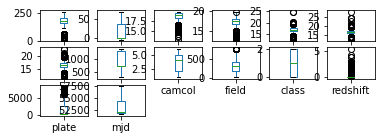

In [16]:
#checking Outliers
df.plot.box(subplots=True,layout=(6,6))

In [17]:
# removing outliers

from scipy.stats import zscore

z=np.abs(zscore(df))
print(df.shape)
df=df.loc[(z<3).all(axis=1)]
print(df.shape)

(10000, 14)
(8713, 14)


In [18]:
df.skew()

ra         -0.131080
dec         1.214165
u          -0.982213
g          -0.528614
r          -0.151366
i           0.059073
z           0.170787
run         0.517015
camcol     -0.143107
field       0.220889
class       0.289700
redshift    4.949300
plate       1.315894
mjd         0.959917
dtype: float64

In [19]:
#lets treat the skewness in the input dataset
for index in df.skew().index:
    if df.skew().loc[index]>0.5:
        df[index]=np.cbrt(df[index])
    if df.skew().loc[index]<-0.5:
        df[index]=np.sqrt(df[index])

In [20]:
df.skew()

ra         -0.131080
dec         0.598981
u          -1.024757
g          -0.597805
r          -0.151366
i           0.059073
z           0.170787
run         0.441851
camcol     -0.143107
field       0.220889
class       0.289700
redshift    0.385026
plate       0.873266
mjd         0.950201
dtype: float64

# Splitting and sending data to model

In [21]:
#splitting the data for training and test

x=df.drop(columns=['class','dec','ra'])
y=df['class']

In [22]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)


In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
max_score=0

for r_state in range(37,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(y_test,pred)
    if score>max_score:
        max_score=score
        final_r_state=r_state
print("Maximimum Accuracy Score is",max_score,'at',final_r_state)


Maximimum Accuracy Score is 0.9959839357429718 at 81


In [24]:

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=81)

model=[LogisticRegression(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of",m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n') 

Accuracy Score of LogisticRegression() is:
0.9959839357429718
[[943   1   2]
 [  3  90   0]
 [  1   0 703]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       946
           1       0.99      0.97      0.98        93
           2       1.00      1.00      1.00       704

    accuracy                           1.00      1743
   macro avg       0.99      0.99      0.99      1743
weighted avg       1.00      1.00      1.00      1743



Accuracy Score of SVC() is:
0.9913941480206541
[[942   1   3]
 [ 10  83   0]
 [  1   0 703]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       946
           1       0.99      0.89      0.94        93
           2       1.00      1.00      1.00       704

    accuracy                           0.99      1743
   macro avg       0.99      0.96      0.98      1743
weighted avg       0.99      0.99      0.99      1743



Accuracy Score of KNeighborsClass

# Using Ensemble Technique

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=81)   #estimator is 100 by default can change it 50,100,150...
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))


0.9931153184165232
[[943   1   2]
 [  7  86   0]
 [  2   0 702]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       946
           1       0.99      0.92      0.96        93
           2       1.00      1.00      1.00       704

    accuracy                           0.99      1743
   macro avg       0.99      0.97      0.98      1743
weighted avg       0.99      0.99      0.99      1743



# Using GridsearchCV

In [26]:
from sklearn.model_selection import GridSearchCV
# using GridsearchCV ti fing best parmeters of logistic regression
lg=LogisticRegression()
parameters={'C':[1,10],'random_state':range(42,100)}
clf=GridSearchCV(lg,parameters)
clf.fit(x,y)
clf.best_params_

{'C': 10, 'random_state': 42}

# Best Model

In [27]:
#so we get the best result in logistic regression model
lg=LogisticRegression(C=10,random_state=42)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('Accuracy score:',accuracy_score(y_test,pred))
print('confusion matrix:',confusion_matrix(y_test,pred))
print('classification report:',classification_report(y_test,pred))

Accuracy score: 0.9959839357429718
confusion matrix: [[943   1   2]
 [  3  90   0]
 [  1   0 703]]
classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       946
           1       0.99      0.97      0.98        93
           2       1.00      1.00      1.00       704

    accuracy                           1.00      1743
   macro avg       0.99      0.99      0.99      1743
weighted avg       1.00      1.00      1.00      1743



# Cross Validation

In [28]:
# cross validation

from sklearn.model_selection import cross_val_score

scores=cross_val_score(lg,x,y,cv=5)
print(scores)
print(scores.mean(),scores.std())

[0.98967298 0.99139415 0.99541021 0.98622273 0.99311137]
0.9911622873320411 0.0031149568138998896


As we can see we are getting maximum accuracy with LogisticRegression. we can save our model with Lg

# Saving the Model

In [29]:
# saving the model

import joblib
joblib.dump(lg,'space_server.obj') 

['space_server.obj']